# Analyzing Cisplatin-Binding Transcripts via GLM-SAE Knowledge Graphs

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite import json_graph

import os, json

with open("data/cisplatin_pos_kg.json") as f:
    data = json.load(f)

G = json_graph.node_link_graph(data, edges="edges")
print(G)

MultiDiGraph with 6172 nodes and 848782 edges


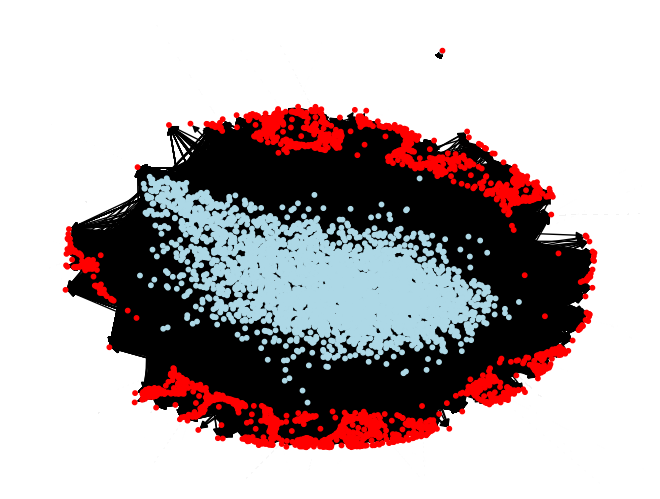

In [40]:
def node_color(x):
    return "lightblue" if type(x) == str else "red"

nx.draw(G, pos=nx.forceatlas2_layout(G), with_labels=False, node_size=10, font_size=4, node_color=[node_color(n) for n in G.nodes])

In [41]:
# use page rank to measure centrality
pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("Nodes ranked by PageRank:")
for node, score in sorted_pagerank[:10]:  # top 10 nodes
    print(f"{node}: {score}")

Nodes ranked by PageRank:
3378: 0.05591438534474252
4793: 0.04776315882634009
407: 0.04058334611930585
2558: 0.02174499892379862
1545: 0.014473227554864115
7612: 0.009225784115039545
6445: 0.00832866187503917
8707: 0.008153740563806095
4014: 0.00770609877987153
9685: 0.005610925728333565


In [42]:
# compare with degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Nodes ranked by Degree Centrality:")
for node, score in sorted_degree[:10]:  # top 10 nodes
    print(f"{node}: {score}")

Nodes ranked by Degree Centrality:
3378: 24.623885918003566
407: 16.557446118943446
4793: 11.028520499108735
2558: 7.617728082968725
<cls>: 7.103386809269162
5746: 7.103386809269162
C: 5.001782531194296
G: 4.875384864689678
T: 4.280343542375628
A: 4.147139847674607


In [43]:
# export to cytoscape for visualization
# Didn't work for the large graph, so just keeping for documentation
for node in G.nodes():
    G.nodes[node]['id'] = node

cyto_data = nx.readwrite.json_graph.cytoscape_data(G)
with open("data/cisplatin_pos_kg_cyto.json", "w") as f:
    json.dump(cyto_data, f)

# Let's Start With A Smaller Graph That We Can Visualize

MultiDiGraph with 2002 nodes and 3868 edges


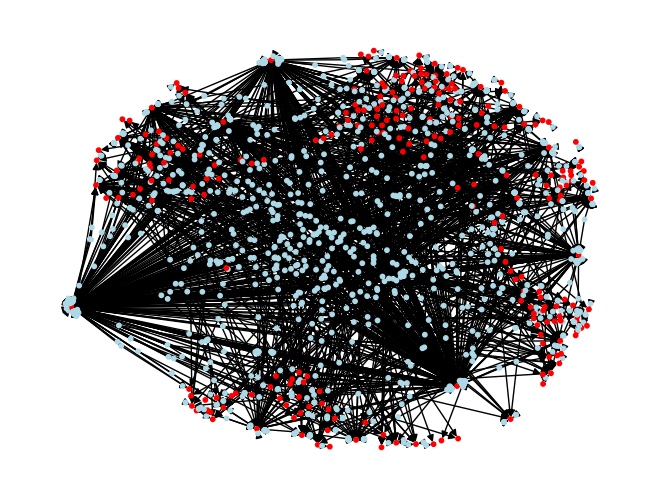

In [44]:
with open("data/af3_dnapos_kg.json") as f:
    data = json.load(f)

G = json_graph.node_link_graph(data, edges="edges")
print(G)

def node_color(x):
    return "lightblue" if type(x) == str else "red"

nx.draw(G, pos=nx.forceatlas2_layout(G), with_labels=False, node_size=10, font_size=4, node_color=[node_color(n) for n in G.nodes])

In [45]:
# use page rank to measure centrality
pagerank = nx.pagerank(G)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

print("Nodes ranked by PageRank:")
for node, score in sorted_pagerank[:10]:  # top 10 nodes
    print(f"{node}: {score}")

Nodes ranked by PageRank:
3378: 0.08914336298020759
407: 0.06463532094933407
2558: 0.039951719546161224
4793: 0.0349818383177545
6445: 0.013610221944794937
1545: 0.011567120772629247
7612: 0.010795852276833759
4014: 0.009881919880671492
8707: 0.007177556194143527
5234: 0.0071685029486347265


In [46]:
# compare with degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

print("Nodes ranked by Degree Centrality:")
for node, score in sorted_degree[:10]:  # top 10 nodes
    print(f"{node}: {score}")


Nodes ranked by Degree Centrality:
3378: 0.37181409295352325
407: 0.3353323338330835
2558: 0.1794102948525737
<cls>: 0.11644177911044477
4793: 0.11244377811094453
5746: 0.10944527736131934
G: 0.07896051974012994
C: 0.07196401799100449
6445: 0.062468765617191405
T: 0.056471764117941026


In [47]:
# export to cytoscape for visualization
# Didn't work for the large graph, so just keeping for documentation
for node in G.nodes():
    G.nodes[node]['id'] = node

cyto_data = nx.readwrite.json_graph.cytoscape_data(G)
with open("data/cisplatin_pos_kg_cyto.json", "w") as f:
    json.dump(cyto_data, f)